# <Font Color="Red">Part-2 Feature -Engineering </font>

# Importing modules 

In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sn
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ReLU
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
warnings.filterwarnings('ignore')

In [184]:
train_data=pd.read_csv('/Users/rupesh/Downloads/Self_casestudy/train.csv')
test_data=pd.read_csv('/Users/rupesh/Downloads/Self_casestudy/test.csv')

## Identifying the Top features using Random Forests 

We know that in the the random forests the decision trees are split based upon the ost important splits on the basis of the information gain . Hence we can use the same principle here to produce the top features of our data 

In [3]:
# Declaring our model of Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = train_data.shape[1], # number of component trees
                            max_depth = 8,
                            min_samples_leaf = train_data.shape[1],
                            max_features = 0.2, # each tree's 20% utility in the features
                            n_jobs = -1)

In [13]:
from sklearn.preprocessing import LabelEncoder
# Encoding our categorical train data 
for col in train_data.select_dtypes(include=['object']).columns:
    enc = LabelEncoder()
    train_data[col] = enc.fit_transform(train_data[col])



In [193]:
# Encoding categorical test data 
for col in test_data.select_dtypes(include=['object']).columns:
    enc = LabelEncoder()
    test_data[col] = enc.fit_transform(test_data[col])

In [10]:
feats=train_data.columns[:-1]
# Obtaining the feature names 

In [15]:
# Fitting the random forest model on train data
rf.fit(train_data[feats], train_data['loss'])
features = train_data[feats].columns.values

In [20]:
#obtaing the important features , grouping and then sorting them
list_imp_feats=sorted(list(zip(rf.feature_importances_, features)),reverse=True)

In [21]:
# As the zipped content is in tuples , we use this code to convert into lists 
for i in range (0,len(list_imp_feats)):
    list_imp_feats[i]=list(list_imp_feats[i])

In [35]:
# To get sorted lists based on the feature importances and their corresponding feature names 
sorted_feat_vals=[]
sorted_feat_names=[]
for i in range (0, len(list_imp_feats)):
    sorted_feat_vals.append(list_imp_feats[i][0])
    sorted_feat_names.append(list_imp_feats[i][1])

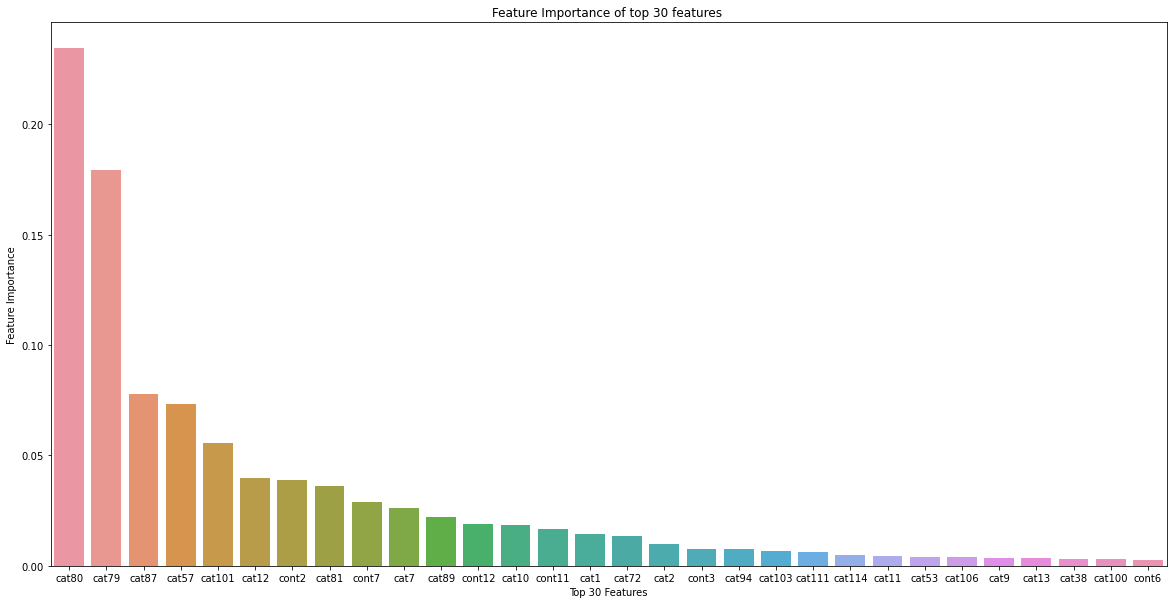

In [43]:
# Plotting the feature importances of top 30 features 
plt.figure(figsize=(20,10))
plt.xlabel("Top 30 Features")
plt.title("Feature Importance of top 30 features ")
plt.ylabel("Feature Importance")
sns.barplot(sorted_feat_names[:30],sorted_feat_vals[:30]) 
plt.show()

In [137]:
import re

In [148]:
for names in sorted_feat_names[:100]:
    x = re.findall("^cont*",names)
    if len(x)>0:
        print(names)

cont2
cont7
cont12
cont11
cont3
cont6
cont10
cont13
cont14
cont4
cont9
cont1
cont8
cont5


In [145]:
for names in sorted_feat_names[:40]:
    x = re.findall("^cat*",names)
    if len(x)>0:
        print(names)

cat80
cat79
cat87
cat57
cat101
cat12
cat81
cat7
cat89
cat10
cat1
cat72
cat2
cat94
cat103
cat111
cat114
cat11
cat53
cat106
cat9
cat13
cat38
cat100
cat105
cat44
cat108
cat75
cat109
cat90
cat116
cat6
cat5
cat25


Here we see that there is a very high feature importance to the features of CAT80 , CAT79 , and other features which are observed in the above graph . An important note to be observed is that almost all the categorical features present in the top 30 features have labels less than 25 . That represents that the very high labeled categories like cat 116 , cat 110 etc , because of their high dimensionlity donot have high importance 

In [54]:
y=train_data['loss'].values
X=train_data.drop(['loss'],axis=1)

## Training autoencoder

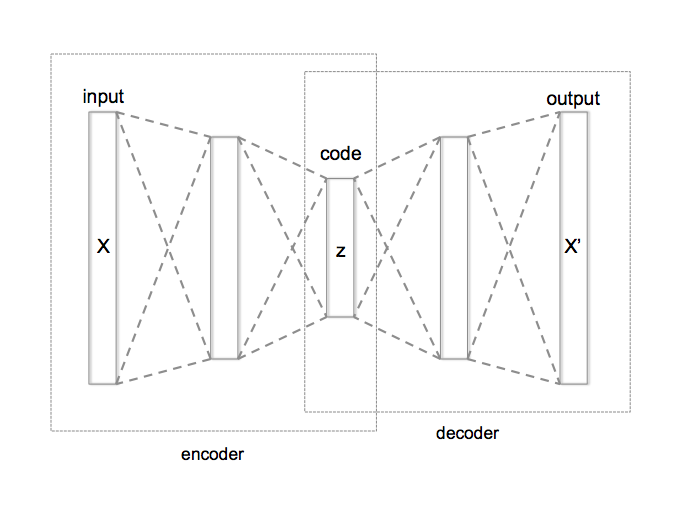

In [112]:
from IPython.display import display, Image
display(Image(filename='/Users/rupesh/Downloads/Autoencoder_structure.png'))

Autoencoders are used here as they use deeplearning techniques to compress(encode) the data and perform Analysis such that when they decode again , we get the most important features as the function of an auto encoder is to do dimensionality reduction , or in other words they try to conserve as much information as possible . Here as we have many features , this method helps us in obtaining the most information out of the data.

In [153]:
X

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0,1,0,0,0,0,0,0,1,0,...,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216
188314,0,0,0,0,0,1,0,0,0,0,...,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872
188315,0,1,0,0,0,0,0,1,1,0,...,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
188316,0,1,0,0,0,0,0,0,1,1,...,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707


In [152]:
X=X.drop('id',axis=1)

In [154]:
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,),name='Input_layer')
# encoder level 1
e = Dense(128, name='Encoder_layer_1')(visible )
e = BatchNormalization(name='Batch_norm_1_of_encoder')(e)
e = ReLU(64,name='Relu_layer1')(e)
# encoder level 2
e = Dense(32, name='Encoder_layer_2')(e)
e = BatchNormalization(name='Batch_norm_2_of_encoder')(e)
e = ReLU(12,name='Relu_layer2')(e)
# bottleneck


n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
# plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 130)]             0         
_________________________________________________________________
Encoder_layer_1 (Dense)      (None, 128)               16768     
_________________________________________________________________
Batch_norm_1_of_encoder (Bat (None, 128)               512       
_________________________________________________________________
Relu_layer1 (ReLU)           (None, 128)               0         
_________________________________________________________________
Encoder_layer_2 (Dense)      (None, 32)                4128      
_________________________________________________________________
Batch_norm_2_of_encoder (Bat (None, 32)                128       
_________________________________________________________________
Relu_layer2 (ReLU)           (None, 32)                0  

## The architecture of the autoencoder

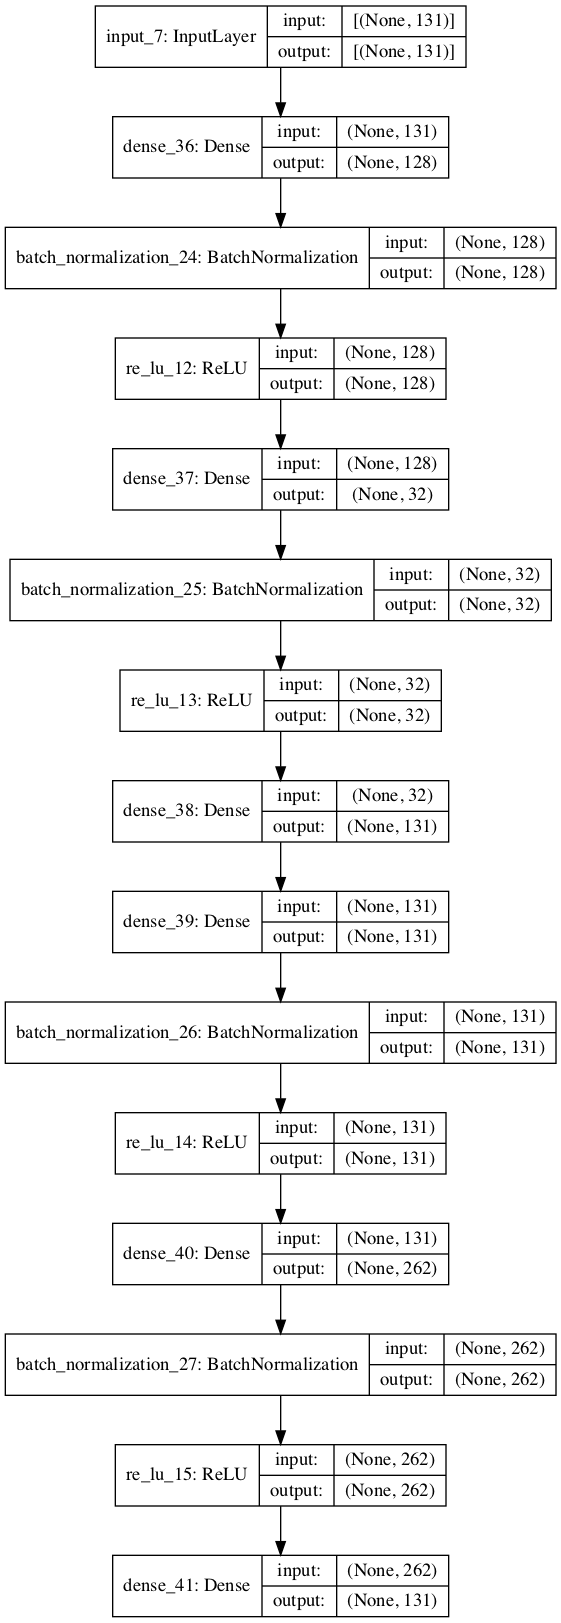

In [117]:
plot_model(model, 'encoder_no_compress.png', show_shapes=True)

In [156]:

model.compile(optimizer='adam', loss='mae')
# fit the autoencoder model to reconstruct input
history = model.fit(X_train,y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,y_test),)

Epoch 1/50
7886/7886 - 14s - loss: 1185.4541 - val_loss: 1164.8768
Epoch 2/50
7886/7886 - 13s - loss: 1185.1523 - val_loss: 1161.7155
Epoch 3/50
7886/7886 - 13s - loss: 1181.8613 - val_loss: 1181.4231
Epoch 4/50
7886/7886 - 13s - loss: 1179.8586 - val_loss: 1177.1172
Epoch 5/50
7886/7886 - 13s - loss: 1179.7366 - val_loss: 1164.4778
Epoch 6/50
7886/7886 - 13s - loss: 1178.4346 - val_loss: 1172.4458
Epoch 7/50
7886/7886 - 13s - loss: 1176.6294 - val_loss: 1178.0405
Epoch 8/50
7886/7886 - 13s - loss: 1175.0184 - val_loss: 1169.9747
Epoch 9/50
7886/7886 - 13s - loss: 1175.5138 - val_loss: 1176.2590
Epoch 10/50
7886/7886 - 13s - loss: 1170.4833 - val_loss: 1168.5964
Epoch 11/50
7886/7886 - 13s - loss: 1170.7981 - val_loss: 1165.5139
Epoch 12/50
7886/7886 - 13s - loss: 1171.6289 - val_loss: 1169.9335
Epoch 13/50
7886/7886 - 13s - loss: 1168.8336 - val_loss: 1167.0602
Epoch 14/50
7886/7886 - 13s - loss: 1167.0225 - val_loss: 1170.9238
Epoch 15/50
7886/7886 - 13s - loss: 1167.6412 - val_loss:

**Plotting the train-test loss while training autoencoder**

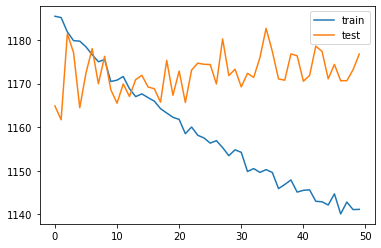

In [166]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)

# save the encoder to file
encoder.save('encoder1.h5')


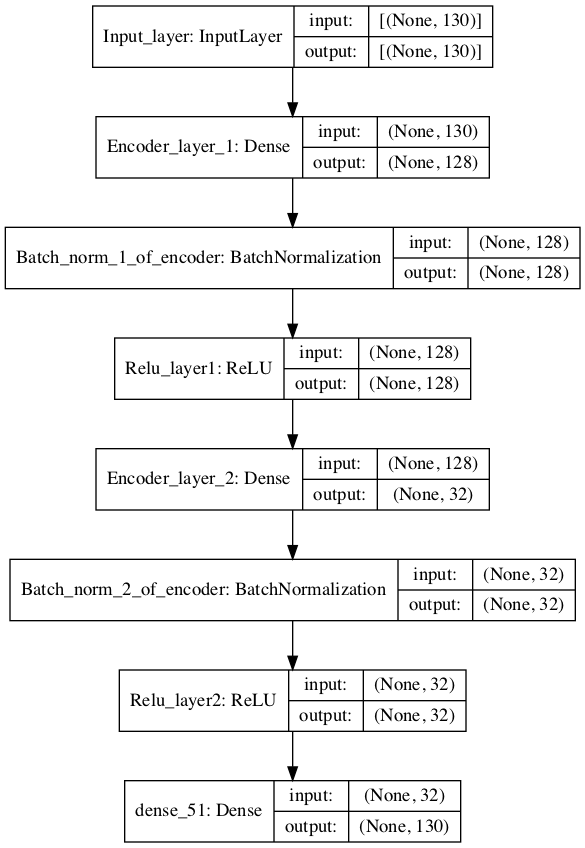

In [164]:
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

In [158]:
from sklearn.metrics import mean_absolute_error


In [159]:
def xg_eval_mae(yhat, y):
    
    return  mean_absolute_error(y,(yhat))

# Baseline model 

I have trained a linear regression model , with only little preprocessing i.e, label encoding the categorical data and processing that through a min-max scaler to produce the processable data . And sent it predict the values and found the model to generate an MAE of 1323.6768

**Why linear regression as baseline model?**

The baseline models are needed to be simple. They should usually consist of relatively few trainable parameters, and can be quickly fit to your data without too much work.
This means that when it comes to engineering, simple models like linear regression are:
Faster to train, giving you very quick feedback on performance.
Better studied, meaning most of the errors you encounter will either be easy bugs in the model, or will highlight that something is wrong with your data.
Quicker for inference, which means deploying them does not require much infrastructure engineering, and will not increase latency.

In [160]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# define dataset
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LinearRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# # calculate accuracy
# print((yhat[:10]))
# print((y_test[:10]))
acc = xg_eval_mae(yhat,y_test)
print(acc)

1323.6713025016616


## Effect of autoencoder on baseline model

The predictions of the autoencoder are concatenated along with the train_data and test data as new features and we see an improvement in the performance of the model immediately .

In [167]:
encoder = load_model('encoder1.h5',compile=False)

In [168]:
X_train_encode=encoder.predict(X_train)

In [169]:
X_test_encode=encoder.predict(X_test)

In [170]:
arr_train = np.concatenate((X_train, X_train_encode), axis=1)
arr_test = np.concatenate((X_test, X_test_encode), axis=1)

In [171]:
# define the model
model =LinearRegression()
# fit the model on the training set
model.fit(arr_train, y_train)
# make predictions on the test set
yhat = model.predict(arr_test)
# calculate classification accuracy
acc = xg_eval_mae(yhat,y_test)
print(acc)

1234.9375885453967


In [201]:
X_testtt=encoder.predict(test_data[train_data.columns[1:-1]])
arr_testtt = np.concatenate((test_data.drop('id',axis=1), X_testtt), axis=1)

In [202]:
len(arr_testtt[0])

260

In [203]:
len(arr_train[0])

260

In [213]:
# define the model
model =LinearRegression()
# fit the model on the training set
model.fit(arr_train, y_train)
# make predictions on the test set
yhat = model.predict(arr_testtt)



In [218]:
acc = xg_eval_mae(abs(model.predict(arr_train)),y_train)
print(acc)


1129.626254268343


In [220]:
yhat=abs(model.predict(arr_testtt))

In [209]:
len(arr_testtt)

125546

In [221]:
ids=test_data['id']
submission = pd.DataFrame()
submission['loss'] = yhat
submission['id'] = ids
submission.to_csv('sub_lin_auto.csv', index=False)

In [222]:
len(submission)

125546

Although thre is slight imporovement in loss (mae) , the results have been very consistent 

Baseline model's pedictions gives us the underlying understanding and expectation of score . And helps us in tuning our models in the next steps . Here , our base line model's score is 1323.67 , i.e, it shows us that a simple model without any kind of tuning has produced such results .

# Conclusions From EDA & Feature Engineering 

**Conclusions from EDA are :**

-> The distribution of loss (target variable ) is highly skewed , hence transforming it with log(x) helps in converting the target variable into normal distribution.

-> There are certain variables in the data both in categorical and continous features which are very highly inter correlated amongst each corresponding class of variables (cat and cont)

->There are small number of outliers in the data , but due to the vast amount of data , they are mostly negligible . But there would be some issues while building distance based models like K-NN , as due to long distance from clusters , the model would be effected.

->There is'nt any distribution differences between the train and test data . This indicates that while training our model in train data , there would'nt be problems of overfitting .

->There are lot of features and there are some features in cat116 , cat110 ,etc which have very high labels which might cause dimensionality problems.

**Conclusions from Feature Engineering are :** 

-> Obtained the top 30 features using Random Forest Regressor which would help us in building and experiment with models .

->By training the autoencoder and then , appending the autoencoder's bottleneck reduced layer and the train_data together we have been able to generate much better results for our baseline model .

->Using both of the above feature engineering methods to create different models would help us achieve great accuracies .